<p style="font-weight:600; font-size:36px">Curve fitting</p>

<p style="font-weight:400; font-size:24px">Jeremy Koch -- 29 Jan 2023</p>

This notebook contains code to perform a basic curve fit via ```scipy.optimize```'s ```curve_fit```. Unlike Excel, any function can be fit with this algorithm. (If it comes up later in the semester, I can share code that fits more complicated situations -- ODE coefficients for cases where there is no analytical solution, data that spans orders of magnitude, simultaneous fits, etc.)

In the code below: Experimental data is given (from my PhD research), and a model function $$v(x,G,g_c,\eta_H,f_B)$$ is defined. This function has one independent variable input, $x$, and four (constant) parameters, $G,g_c,\eta_H,f_B=$```G,gc,nH,fB```.

The call to ```curve_fit``` essentially tries to fit the function ```v``` to the experimental data. The call includes an extra and valuable command: ```bounds=(0, np.inf)```. This insists that the algorithm only look for fits with positive values of the parameters. This can be reworked to set unique bounds for each parameter, for example if one of your parameters can take values from $-\infty$ to $\infty$ and another must be between 0 and 1.

Lastly, the experimental data is plotted alongside the fit curve, and the fit values are printed with a command that rounds them to 3 decimal places. Typically, experimental data is plotted with discrete points and theoretical or fit curves are smooth.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

fit values: G= 31.387 , gc= 7.46 , nH= 5.149 , fB= 0.01


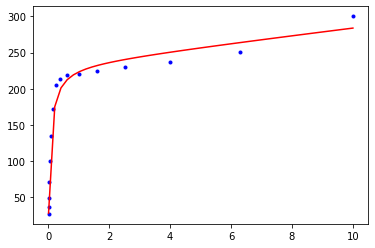

In [8]:
# experimental data
x_exp=np.array([9.99991,6.30959,3.98105,2.51174,1.58487,0.99994,0.63104,0.39806,0.25115,0.15849,
              0.09999,0.0631,0.0398,0.02512,0.01585,0.01])
y_exp=np.array([300.297,250.444,237.17,229.641,224.519,220.818,218.62,213.132,204.573,172.079,
              135.38,99.5142,71.0392,49.0162,35.9663,26.9438])


# model equation, with 4 parameters
def v(x,G,gc,nH,fB):
    return gc*(G+nH*fB)/(x+gc*fB)*x+nH/(x+gc*fB)*x**2

fits, _ = curve_fit(v, x_exp, y_exp,bounds=(0, np.inf))
# seeks the fit for the four parameters in the model: G,gc,nH,fB
# returns an array with the four fit values, and additional output is ignored with _
# The last bit about bounds forces each parameter to be positive.
# Can replace this with tighter bounds, and can be specific to each parameter if you want.
# see scipy documentation if interested


x_fit=np.linspace(np.amin(x_exp),np.amax(x_exp)) # creates an array based on the min and max x values of exp data
y_fit=v(x_fit,fits[0],fits[1],fits[2],fits[3])   # plugs in x with fit values
plt.plot(x_exp,y_exp,'b.')
plt.plot(x_fit,y_fit,'r-')
plt.plot()

print("fit values:","G=",fits[0].round(decimals=3),", gc=",fits[1].round(decimals=3),
      ", nH=",fits[2].round(decimals=3),", fB=",fits[3].round(decimals=3))